In [2]:
%matplotlib notebook

import cv2 as cv
import numpy as np
from io import StringIO
import matplotlib.pyplot as plt

# Generating C Array 

In [5]:
img = cv.imread("sudoku.png", cv.IMREAD_GRAYSCALE)
img

array([[169, 164, 164, ..., 206, 206, 206],
       [168, 164, 165, ..., 206, 206, 206],
       [167, 163, 164, ..., 206, 206, 206],
       ...,
       [ 45,  46,  45, ..., 136, 136, 133],
       [ 47,  48,  47, ..., 133, 133, 131],
       [ 47,  48,  47, ..., 133, 133, 131]], dtype=uint8)

<IPython.core.display.Javascript object>


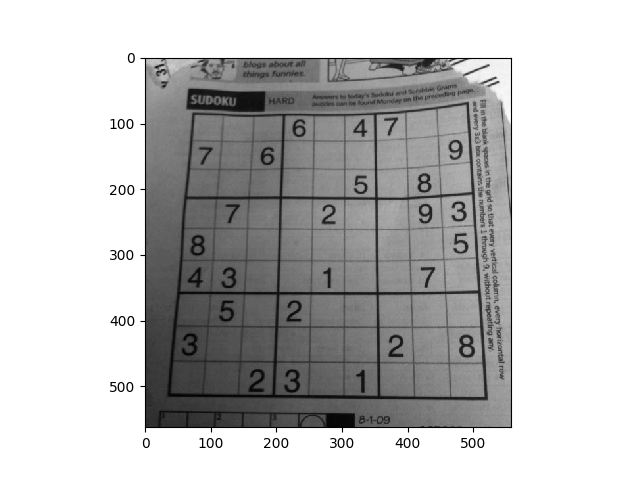

In [9]:
plt.imshow(img, cmap='gray');

In [10]:
edges = cv.Canny(img, 50, 200, None, 3)

<IPython.core.display.Javascript object>


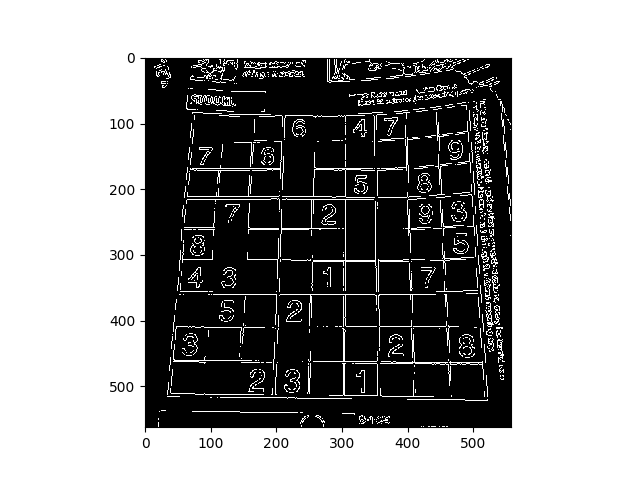

In [11]:
plt.imshow(edges, cmap='gray');

In [19]:
tmp_file = StringIO()

delimiter = ", "

np.savetxt(tmp_file, edges, fmt="%d", delimiter=delimiter)

rows = map(lambda x: '{' + x[:] + '},', tmp_file.getvalue().splitlines())
full = "\n".join(rows)[:-1]

file_header = f"""#pragma once

#define ROWS {edges.shape[0]}
#define COLUMNS {edges.shape[1]}

static const unsigned char image[ROWS][COLUMNS] = {{ 
{full} 
}};
#endif
"""

with open("image.h", "w") as f:
    f.write(file_header)

### Test

In [13]:
with open("image.h", "r") as f:
    s = f.read()

s = s.split('\n', 6)[6][:-11]  # original output of np.sasvetxt

rows2 = map(lambda x: x[1:-2], s.splitlines())
full2 = "\n".join(rows2)

tmp_file = StringIO(full2)
arr = np.loadtxt(tmp_file, dtype=np.uint8, delimiter=delimiter)

np.all(arr == edges)

True

# Writing lines on top of file

## Probabilistic Hough Transform

In [14]:
# Copy edges to the images that will display the results in BGR
transf = cv.cvtColor(edges, cv.COLOR_GRAY2RGB)
transfP = np.copy(transf)

In [15]:
linesP = cv.HoughLinesP(edges, 1, np.pi / 180, 50, None, 50, 10).reshape(-1,4)

# Draw the lines
for l in linesP:
    cv.line(transfP, (l[0], l[1]), (l[2], l[3]), (255,0,0), 2, cv.LINE_AA)

<IPython.core.display.Javascript object>


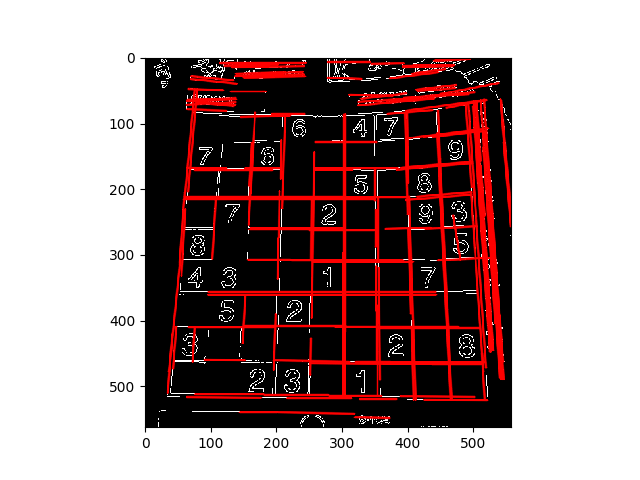

In [16]:
plt.imshow(transfP);

## Standard Hough Transform

In [17]:
lines = cv.HoughLines(edges, 1, np.pi / 180, 150, None, 0, 0).reshape(-1, 2)
  
if lines is not None:
    params = np.stack([lines[:,0], np.cos(lines[:, 1]), np.sin(lines[:,1])], axis=-1)
    for l in params:
        rho = l[0]
        a = l[1]
        b = l[2]
        x0 = a * rho
        y0 = b * rho
        pt1 = (np.int(x0 + 1000*(-b)), np.int(y0 + 1000*(a)))
        pt2 = (np.int(x0 - 1000*(-b)), np.int(y0 - 1000*(a)))
        cv.line(transf, pt1, pt2, (255,0,0), 2, cv.LINE_AA)

<IPython.core.display.Javascript object>


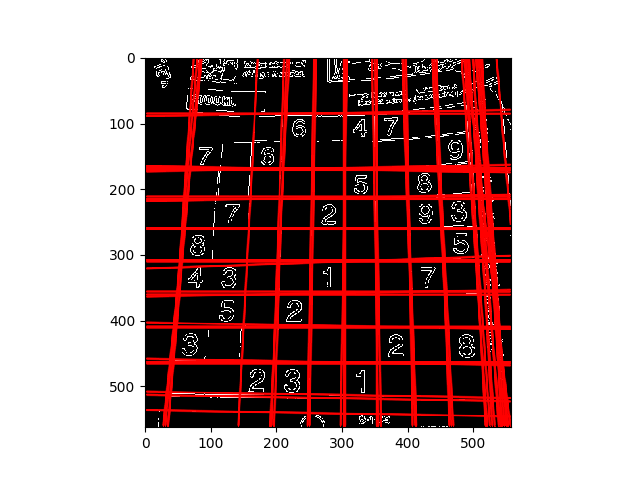

In [18]:
plt.imshow(transf);